In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline
import os
from netCDF4 import Dataset as netcdf_dataset
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature 
# When data are defined in lat/lon coordinate system, PlateCarree()
# is the appropriate choice:

In [3]:
# I changed the time units so they could be parsed:
nc_in = 'sst_Had-1979-2016.nc'
ds = xr.open_dataset(nc_in)
time_attr = ds.time.attrs
SST_attr = ds.SST_cpl.attrs
ds

<xarray.Dataset>
Dimensions:            (lat: 96, lon: 144, time: 456)
Coordinates:
  * lon                (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * lat                (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 ...
  * time               (time) datetime64[ns] 1979-01-16T12:00:00 1979-02-15 ...
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float64 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:  Thu Apr 26 11:37:46 2018: ncatted -a units,time,m,c,days since ...
    NCO:      "4.6.2"

In [419]:
sst = ds.SST_cpl
sst_clim = ds.SST_cpl.groupby('time.month').mean(dim='time')
#sst_clim.mean(dim=['lon','lat']).plot()

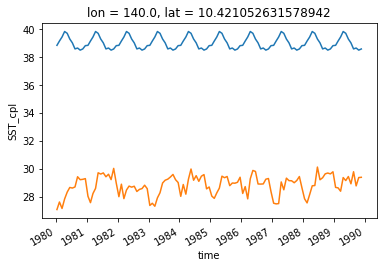

In [420]:
sst_anom = sst.groupby('time.month') - sst_clim
# set anomalies = 0 where desired: 
# CASE 1: Indian Ocean Climatology 
#
sst_anom[:,(sst.lat>-60)&(sst.lat<-5),(sst.lon>20)&(sst.lon<120)] = 10 
sst_anom[:,(sst.lat>-5)&(sst.lat<30),(sst.lon>20)&(sst.lon<100)] = 10 
# add climo back
sst_ind = (sst_anom.groupby('time.month') + sst_clim)
sst_ind.sel(lat=0, lon=90, method='nearest').sel(time=slice('1980-01-01','1989-12-01')).plot()
sst_ind.sel(lat=10, lon=140, method='nearest').sel(time=slice('1980-01-01','1989-12-01')).plot()

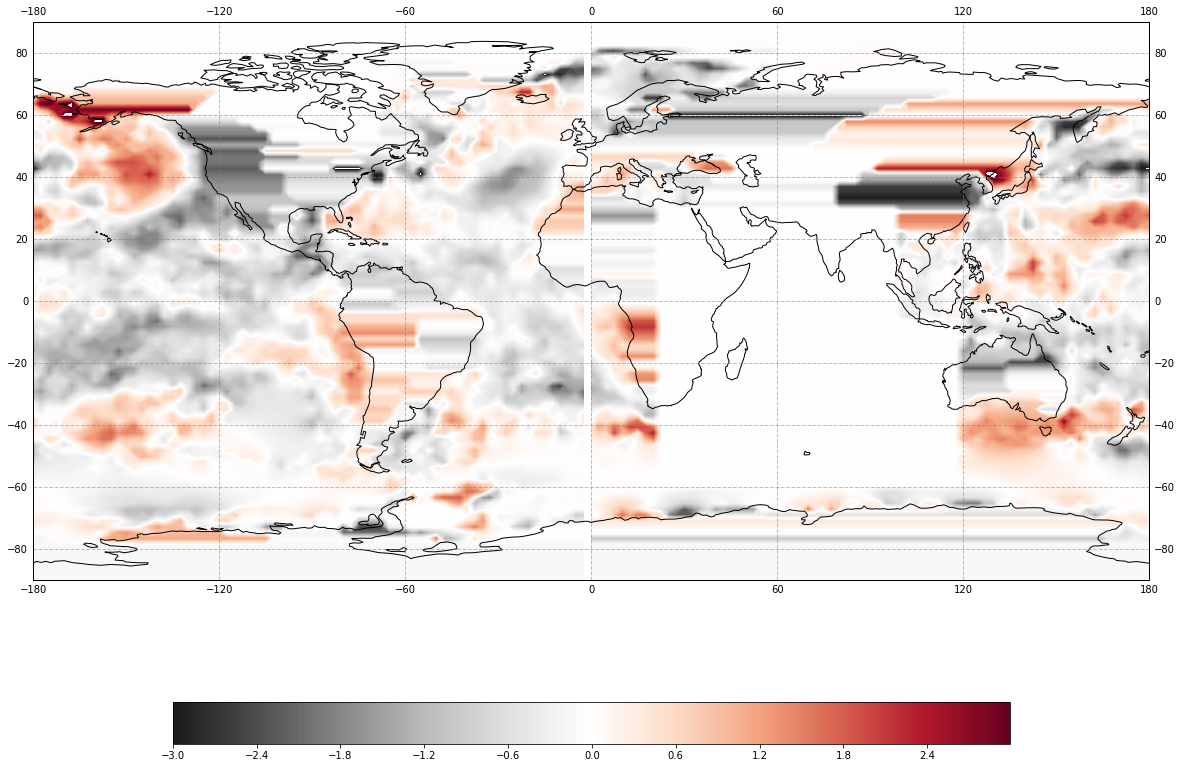

In [421]:
plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(sst_ind.lon, sst_ind.lat, sst_ind[0]-sst_ind[12], 60,
             transform=ccrs.PlateCarree(), cmap = 'RdGy_r',levels=np.arange(-3,3,.01))
data_crs = ccrs.PlateCarree()
gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
cb = plt.colorbar(orientation='horizontal', shrink = 0.75, pad=0.15)

In [422]:
ds['SST_cpl'] = sst_ind.transpose('time','lat','lon')
ds.time.attrs = time_attr
ds.SST_cpl.attrs = SST_attr
ds.SST_cpl_prediddle.attrs = SST_attr
ds.to_netcdf('sst_Had-1979-2016-indpatch.nc')

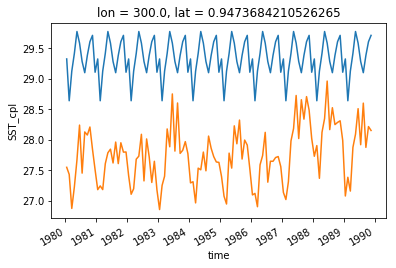

In [423]:
sst_anom = sst.groupby('time.month') - sst_clim
# set anomalies = 0 where desired:
# CASE 2: Pacific Ocean Climatology 
#
sst_anom[:,(sst.lat>-60)&(sst.lat<-5),(sst.lon>120)&(sst.lon<290)] = 0 
sst_anom[:,(sst.lat>-5)&(sst.lat<60),(sst.lon>100)&(sst.lon<181)] = 0 
sst_anom[:,(sst.lat>-5)&(sst.lat<13),(sst.lon>180)&(sst.lon<281)]=0
sst_anom[:,(sst.lat>13)&(sst.lat<15),(sst.lon>180)&(sst.lon<265)]=0
sst_anom[:,(sst.lat>15)&(sst.lat<60),(sst.lon>180)&(sst.lon<265)]=0
# add climo back

sst_pac = (sst_anom.groupby('time.month') + sst_clim)
sst_pac.sel(lat=0, lon=140, method='nearest').sel(time=slice('1980-01-01','1989-12-01')).plot()
sst_pac.sel(lat=0, lon=300, method='nearest').sel(time=slice('1980-01-01','1989-12-01')).plot()

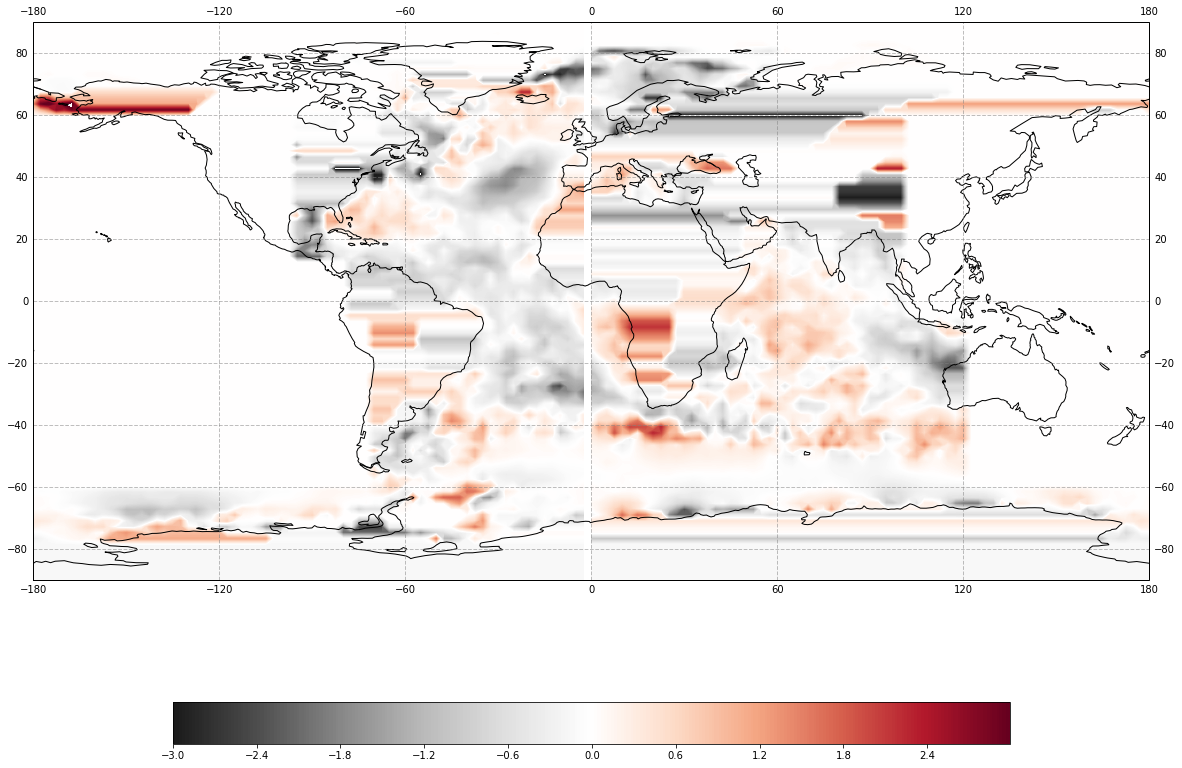

In [424]:
plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(sst_pac.lon, sst_pac.lat, sst_pac[0]-sst_pac[12], 60,
             transform=ccrs.PlateCarree(), cmap = 'RdGy_r',levels=np.arange(-3,3,.01))
data_crs = ccrs.PlateCarree()
gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
cb = plt.colorbar(orientation='horizontal', shrink = 0.75, pad=0.15)

In [425]:
ds['SST_cpl'] = sst_pac.transpose('time','lat','lon')
ds.time.attrs = time_attr
ds.SST_cpl.attrs = SST_attr
ds.SST_cpl_prediddle.attrs = SST_attr
ds.to_netcdf('sst_Had-1979-2016-pacpatch.nc')

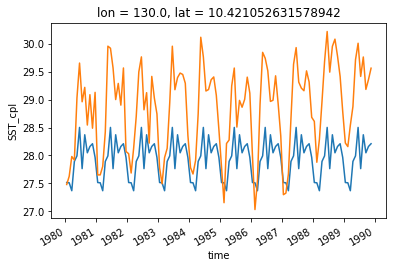

In [426]:
sst_anom = sst.groupby('time.month') - sst_clim
# set anomalies = 0 where desired:
# CASE 2: Atlantic Ocean Climatology 
#
sst_anom[:,(abs(sst.lat)<60),((sst.lon)<21)] = 0
sst_anom[:,(abs(sst.lat)<60),((sst.lon)>289)]=0
sst_anom[:,(sst.lat>11)&(sst.lat<41),(sst.lon>275)&(sst.lon<289)]=0
sst_anom[:,(sst.lat>19)&(sst.lat<35),(sst.lon>259)&(sst.lon<276)]=0
# add climo back
sst_atl = (sst_anom.groupby('time.month') + sst_clim)
sst_atl.sel(lat=0, lon=300, method='nearest').sel(time=slice('1980-01-01','1989-12-01')).plot()
sst_atl.sel(lat=10, lon=130, method='nearest').sel(time=slice('1980-01-01','1989-12-01')).plot()

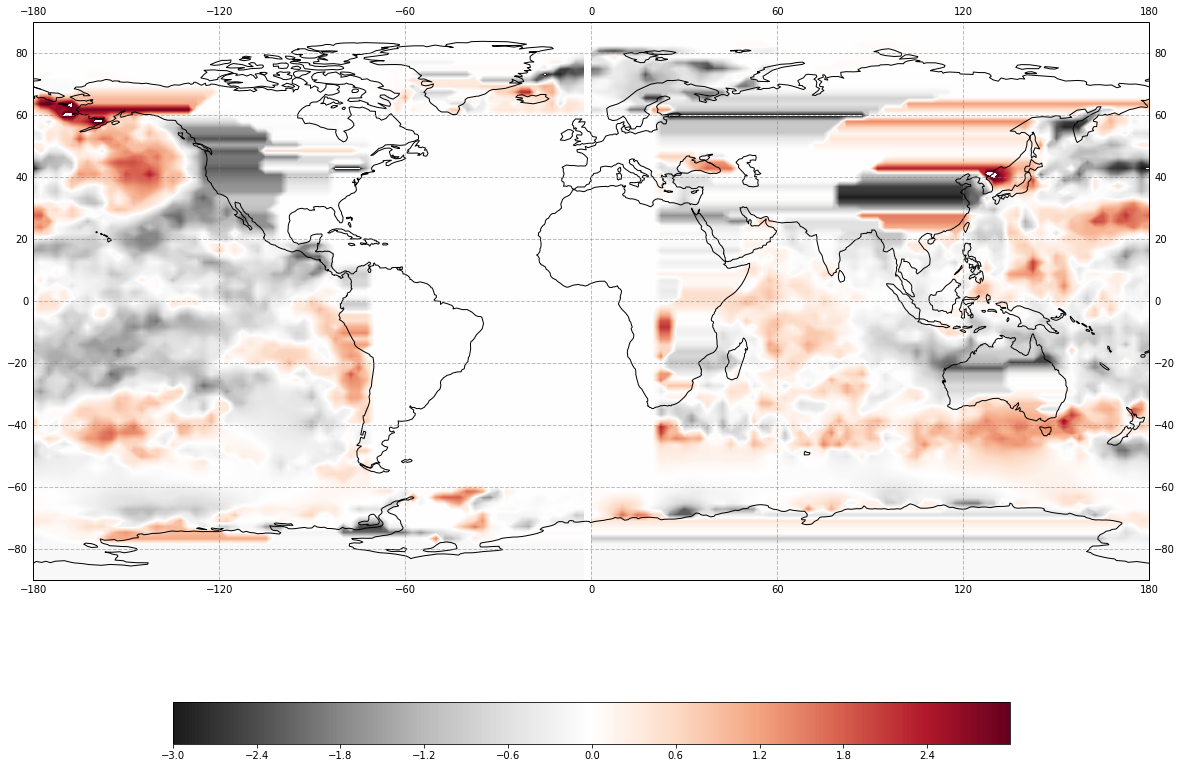

In [427]:
plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(sst_atl.lon, sst_atl.lat, sst_atl[0]-sst_atl[12], 60,
             transform=ccrs.PlateCarree(), cmap = 'RdGy_r',levels=np.arange(-3,3,.01))
data_crs = ccrs.PlateCarree()
gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
cb = plt.colorbar(orientation='horizontal', shrink = 0.75, pad=0.15)

In [428]:
ds['SST_cpl'] = sst_atl.transpose('time','lat','lon')
ds.time.attrs = time_attr
ds.SST_cpl.attrs = SST_attr
ds.SST_cpl_prediddle.attrs = SST_attr
ds.to_netcdf('sst_Had-1979-2016-atlpatch.nc')